# G-and-k distribution

Notebook for the convergence of the MMD$^2$ approximation

### Mount Drive

In [ ]:
# mount my drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The following path has to be adjusted if necessary:

In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/Utils.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/Plot_fcts.ipynb"

### Imports

In [ ]:
! pip install qmcpy --quiet

In [ ]:
import numpy as np
import qmcpy

### Sampling

In [ ]:
np.random.seed(11)

Set parameters:

In [ ]:
n = [ 2**j for j in range(4,14) ]      # number of simulated samples - powers of 2
m = 2**14                              # number of true samples
num = 25                               # numbers of repetitions for MC and RQMC
theta = np.array([3,1,1,-np.log(2)])   # true theta
d = 1                                  # dimensions of data
p = theta.shape[0]                     # dimensions of parameter space
l = -1                                 # lengthscale (l=-1 for median heuristic)

Sample from the g-and-k distribution:

In [ ]:
y,_ = sample_gandk('MC',m,d,theta)

### MMD$^2$ convergence

Define the QMC sequence:

In [ ]:
qmc = qmcpy.Halton(d+1)

Calculate MMD$^2$ approximation for varying $n$:

In [ ]:
mmd_mc,mmd_qmc,mmd_rqmc,MMD_min_mc,MMD_max_mc,MMD_min_rqmc,MMD_max_rqmc = mmd_conv('gandk',n,num,d,y,l,theta)

sample size:  16
sample size:  32
sample size:  64
sample size:  128
sample size:  256
sample size:  512
sample size:  1024
sample size:  2048
sample size:  4096
sample size:  8192


Plot the MMD$^2$ approximation against $n$:

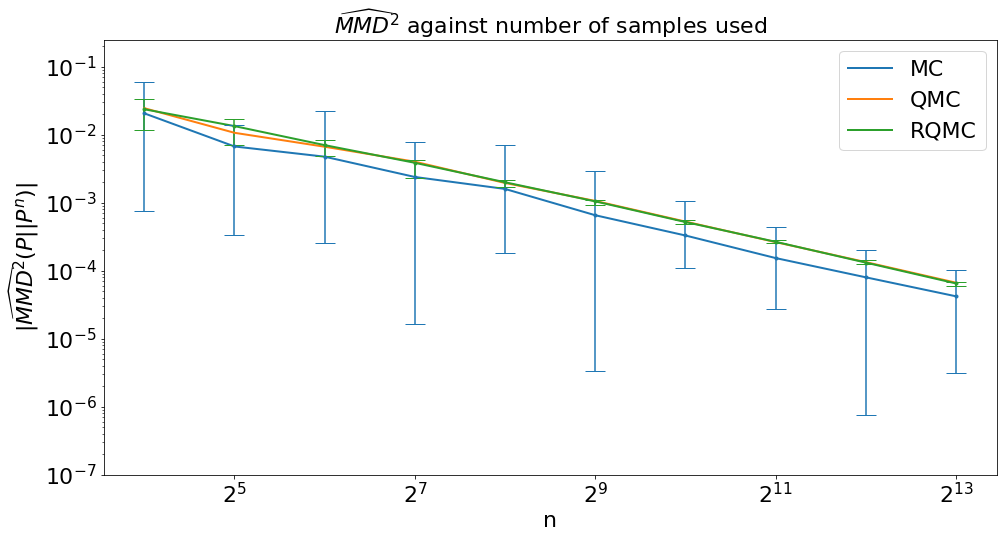

In [ ]:
plot_mmd_conv(d,(16,8),mmd_mc,mmd_qmc,mmd_rqmc,'MC','QMC','RQMC',MMD_min_mc,MMD_max_mc,MMD_min_rqmc,MMD_max_rqmc,'gandk')